In [80]:
#AYKIRI VERİLERİN AYIKLANMASI

In [72]:
import pandas as pd
import seaborn as sb
import numpy as np
!pip install missingno
import missingno as ms

In [59]:
df = sb.load_dataset("planets")

In [60]:
df_mass = df["mass"]

In [61]:
df_period.describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

<AxesSubplot:xlabel='mass'>

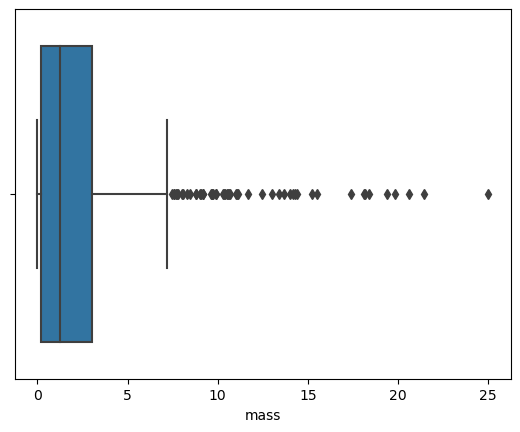

In [62]:
sb.boxplot(x=df_mass)

In [63]:
df_mass = pd.DataFrame(df_mass)

In [64]:
df_mass.mean()

mass    2.638161
dtype: float64

In [65]:
Q1= df_mass.quantile(0.25)
print(Q1)

mass    0.229
Name: 0.25, dtype: float64


In [66]:
Q3= df_mass.quantile(0.75)
print(Q3)

mass    3.04
Name: 0.75, dtype: float64


In [67]:
IQR = Q3-Q1
print(IQR)

mass    2.811
dtype: float64


In [68]:
alt_sınır = Q1-1.5*IQR
print(alt_sınır)

mass   -3.9875
dtype: float64


In [69]:
ust_sınır = Q3+1.5*IQR
print(ust_sınır)

mass    7.2565
dtype: float64


In [70]:
ust = (df_mass > ust_sınır)
alt = (df_mass < alt_sınır)
new = df_mass[~(ust | alt).any(axis=1)]

In [71]:
new

,mass
0,7.10
1,2.21
2,2.60
5,4.80
6,4.64
...,...
1030,NaN
1031,NaN
1032,NaN
1033,NaN


In [ ]:
#EKSİK VERİ İŞLEMLERİ (AGE DEĞERİNİ ORTALAMA AGE VERİLERİYLE, DECK VERİLERİNİ İSE MODE() METODUYLA DOLDURALIM.)

In [81]:
df_titanic = sb.load_dataset("titanic")

<AxesSubplot:>

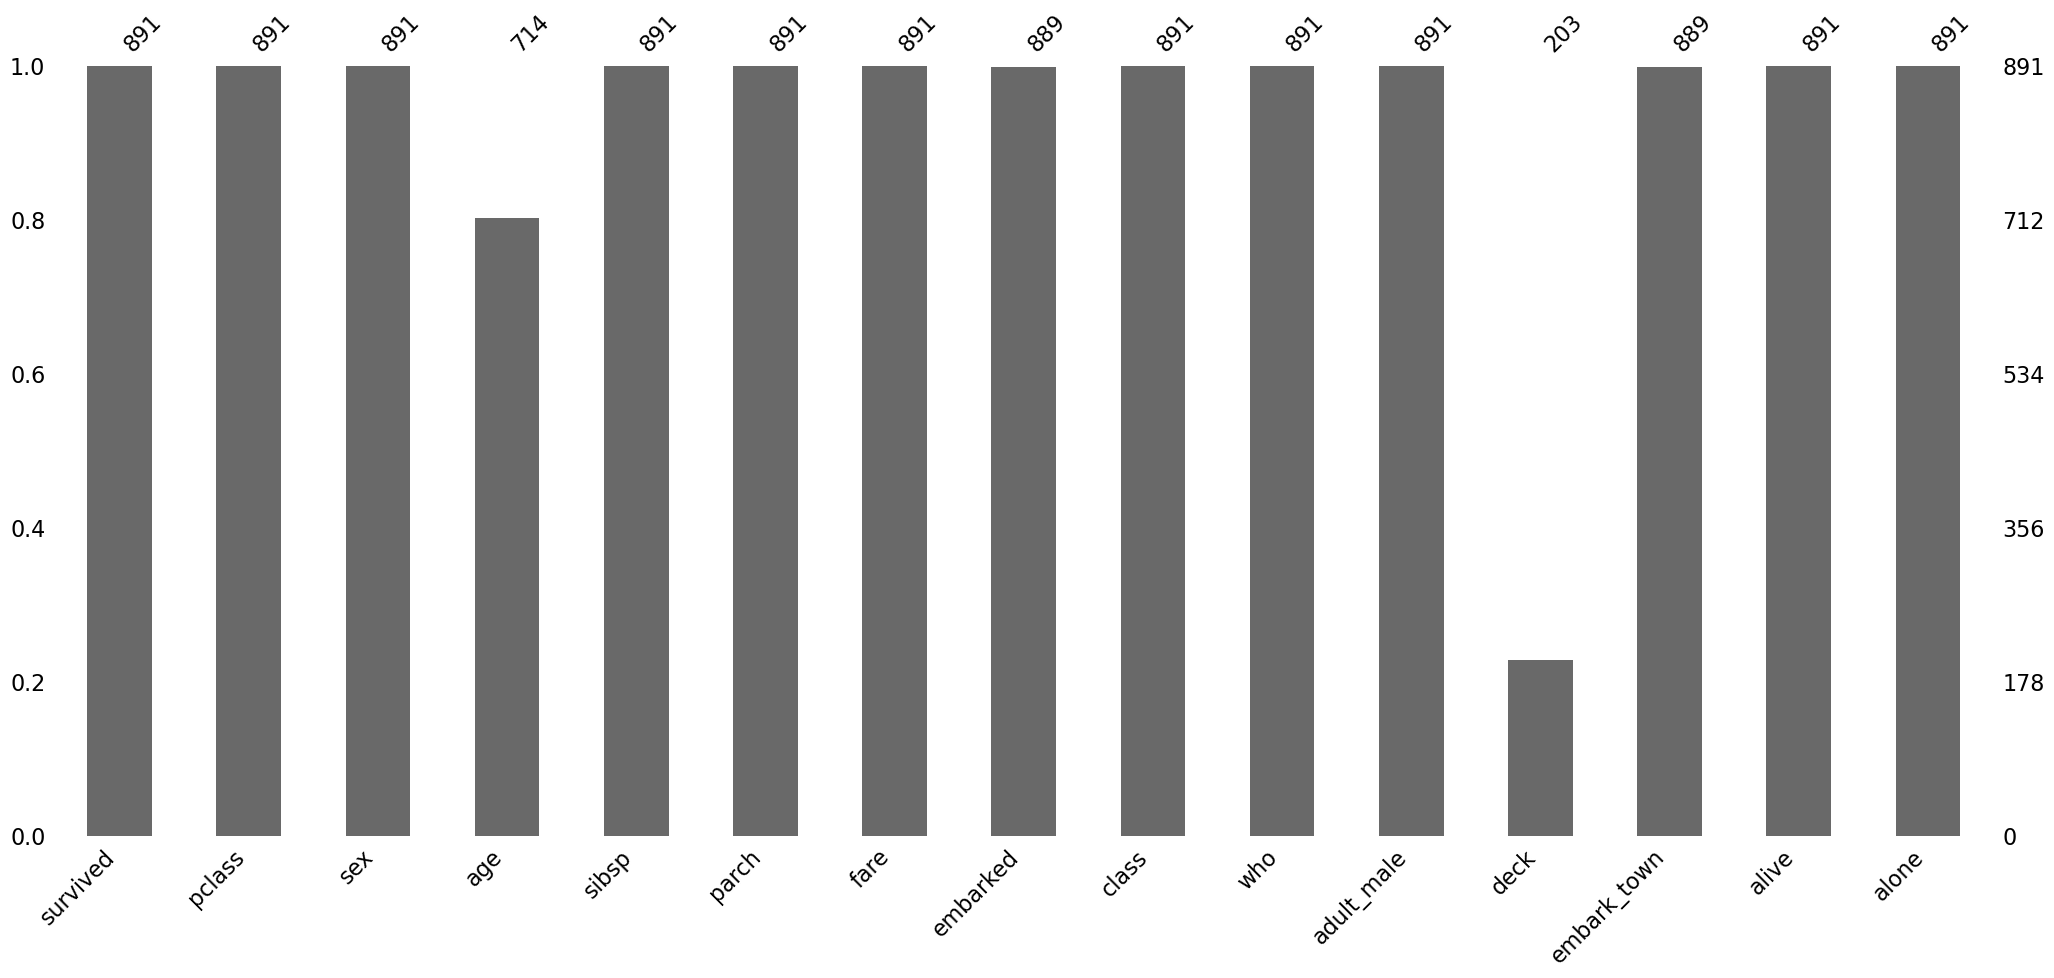

In [84]:
ms.bar(df_titanic)

In [86]:
df_titanic["age"].mean() 

29.69911764705882

In [87]:
df_titanic["age"].fillna(df_titanic.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [90]:
df_titanic["deck"].mode()[0]

'C'

In [88]:
df_titanic["deck"].fillna(df_titanic.deck.mode()[0])

0      C
1      C
2      C
3      C
4      C
      ..
886    C
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [91]:
#VERİLEN AGE DEĞERİNİ SEX DEĞİŞKENİNE GÖRE ORTALAMA DEĞERİNİ ALMA 

In [95]:
df_titanic["age"].fillna(df_titanic.groupby("sex")["age"].transform("mean"))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64